<a href="https://colab.research.google.com/github/HemaRavi94/Boston-Housicing-price/blob/main/House%20Pricing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt 

import pandas as pd  
import seaborn as sns 

%matplotlib inline

In [ ]:
from sklearn.datasets import load_boston
boston_dataset = load_boston()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

**Linear regression**

In [ ]:
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [ ]:
boston['MEDV'] = boston_dataset.target

In [ ]:
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


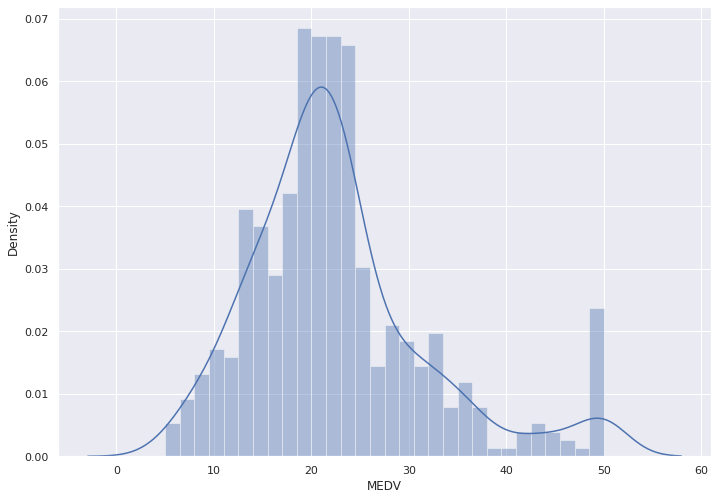

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(boston['MEDV'], bins=30)
plt.show()

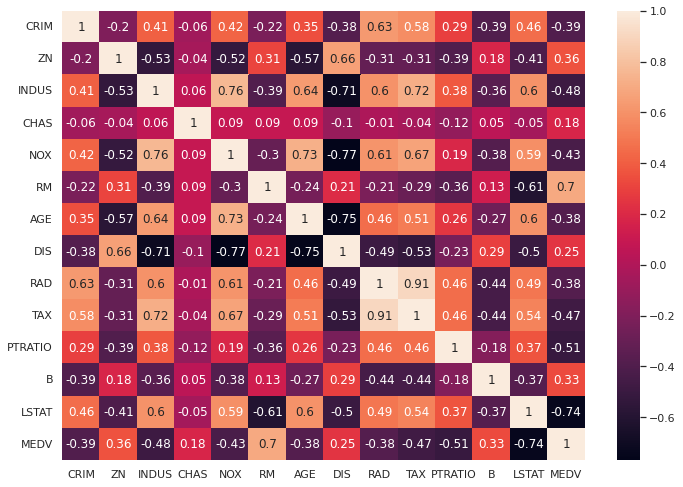

In [ ]:
correlation_matrix = boston.corr().round(2)

sns.heatmap(data=correlation_matrix, annot=True)

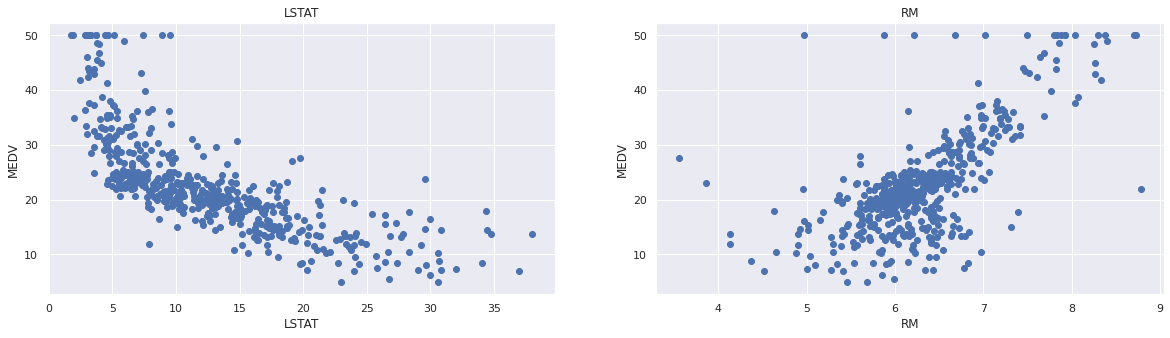

In [ ]:
plt.figure(figsize=(20, 5))

features = ['LSTAT', 'RM']
target = boston['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = boston[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

**Preparing the data for training the model**

In [ ]:
X = pd.DataFrame(np.c_[boston['LSTAT'], boston['RM']], columns = ['LSTAT','RM'])
Y = boston['MEDV']

**Splitting the data into training and testing sets**

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 2)
(102, 2)
(404,)
(102,)


**Training and testing the model**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression()

**Model evaluation**

In [ ]:
from sklearn.metrics import r2_score
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")


y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 5.6371293350711955
R2 score is 0.6300745149331701


The model performance for testing set
--------------------------------------
RMSE is 5.137400784702911
R2 score is 0.6628996975186952


**Comparison of performance**


In [ ]:
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler

from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

In [ ]:
boston.shape

(506, 14)

In [ ]:
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [ ]:
boston.nunique()

CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
MEDV       229
dtype: int64

In [ ]:
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


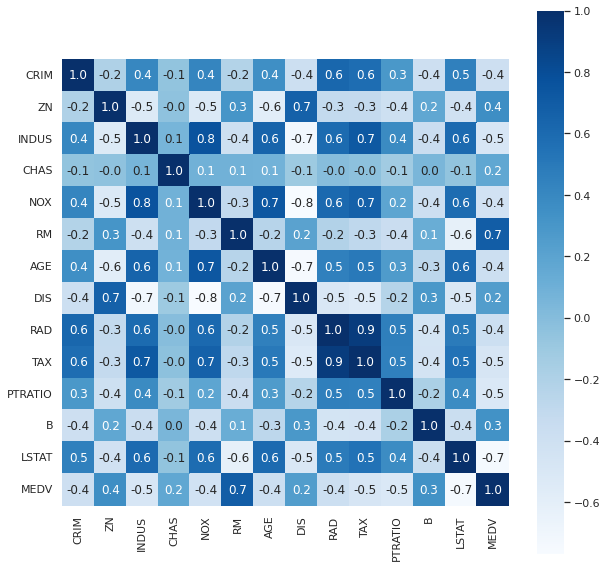

In [ ]:
correlation = boston.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation,cmap='Blues',annot=True,fmt='.1f',square=True)

In [ ]:
skew = boston.skew().sort_values(ascending = False)
print(skew)

CRIM       5.223149
CHAS       3.405904
ZN         2.225666
MEDV       1.108098
DIS        1.011781
RAD        1.004815
LSTAT      0.906460
NOX        0.729308
TAX        0.669956
RM         0.403612
INDUS      0.295022
AGE       -0.598963
PTRATIO   -0.802325
B         -2.890374
dtype: float64


**Checking outliers using boxplots**

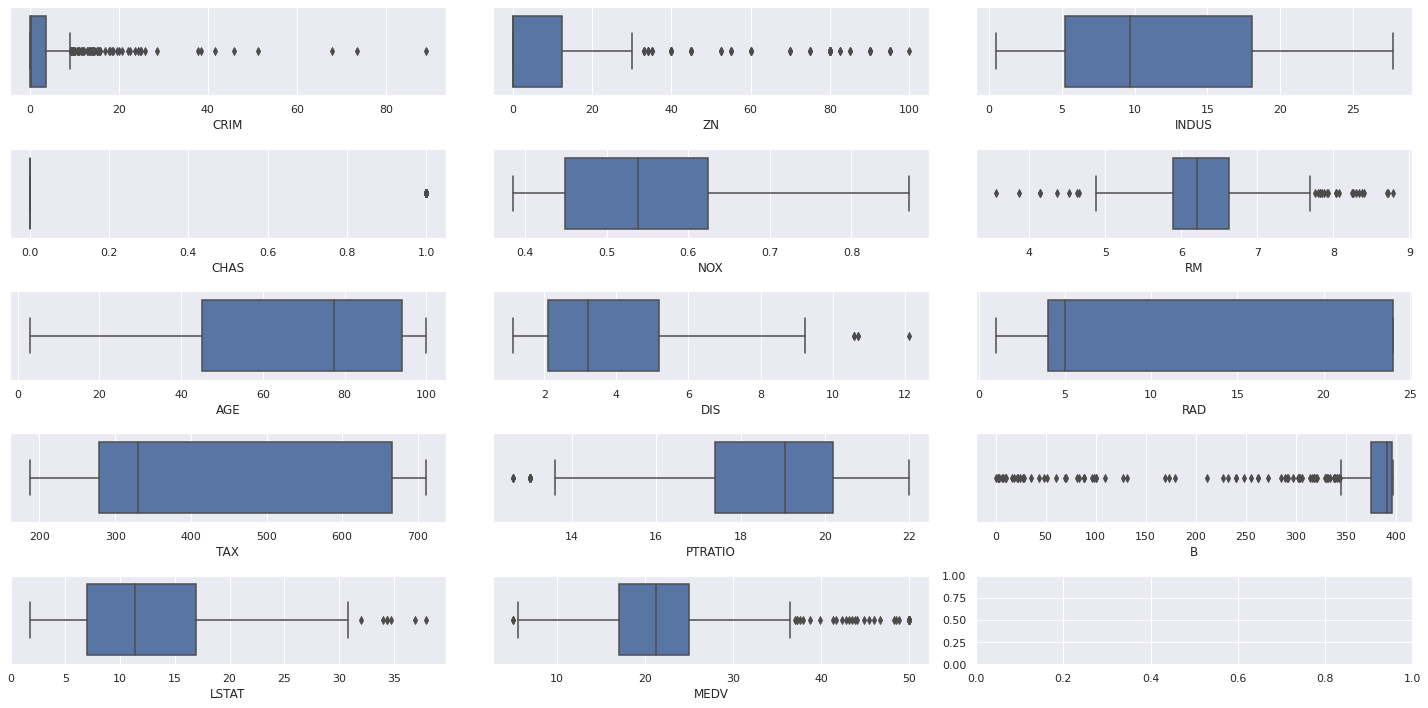

In [ ]:
fig, ax = plt.subplots(ncols = 3, nrows = 5, figsize = (20, 10))
index = 0
ax = ax.flatten()

for col, value in boston.items():
    sns.boxplot(x=col, data=boston, ax=ax[index])
    index += 1
plt.tight_layout()


**Normalising the dataset using min max normalizarion**



In [ ]:
scaler = MinMaxScaler()
cols = ['CRIM', 'ZN', 'TAX', 'B']   #as the values in these columns are very high

boston[cols]=scaler.fit_transform(boston[cols])
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.000000,0.18,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,0.208015,15.3,1.000000,4.98,24.0
1,0.000236,0.00,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,0.104962,17.8,1.000000,9.14,21.6
2,0.000236,0.00,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,0.104962,17.8,0.989737,4.03,34.7
3,0.000293,0.00,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,0.066794,18.7,0.994276,2.94,33.4
4,0.000705,0.00,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,0.066794,18.7,1.000000,5.33,36.2


In [ ]:
boston.max()

CRIM         1.0000
ZN           1.0000
INDUS       27.7400
CHAS         1.0000
NOX          0.8710
RM           8.7800
AGE        100.0000
DIS         12.1265
RAD         24.0000
TAX          1.0000
PTRATIO     22.0000
B            1.0000
LSTAT       37.9700
MEDV        50.0000
dtype: float64

In [ ]:
x = boston.drop(['MEDV'],axis=1)
y = boston['MEDV']
#splitting the data
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=2,test_size=0.2)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)


(404, 13) (102, 13) (404,) (102,)


In [ ]:
#load the model
model1 = XGBRegressor()

#train the model
model1.fit(x_train,y_train)

[10:22:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [ ]:
prediction1 = model1.predict(x_test)

#Evaluating model
accuracy1 = round(100*metrics.r2_score(y_test,prediction1),2)
print(accuracy1)

91.16


In [ ]:
model2 = DecisionTreeRegressor()

#Train the model
model2.fit(x_train,y_train)

DecisionTreeRegressor()

In [ ]:
#Predict values
prediction2 = model2.predict(x_test)

#Evaluate model
accuracy2 = 100*round(metrics.r2_score(y_test,prediction2),2)
print(accuracy2)

72.0


In [ ]:
#load the model
model3 = RandomForestRegressor()

#Train the model
model3.fit(x_train,y_train)
RandomForestRegressor()
#Predict values
prediction3 = model3.predict(x_test)

#Evaluate model
accuracy3 = 100*round(metrics.r2_score(y_test,prediction3),2)
print(accuracy3)

89.0


In [ ]:
#load the model
model4 = LinearRegression()

#Train the model
model4.fit(x_train,y_train)
LinearRegression()
#Predict values
prediction4 = model4.predict(x_test)

#Evaluate model
accuracy4 = 100*round(metrics.r2_score(y_test,prediction4),2)
print(accuracy4)

78.0


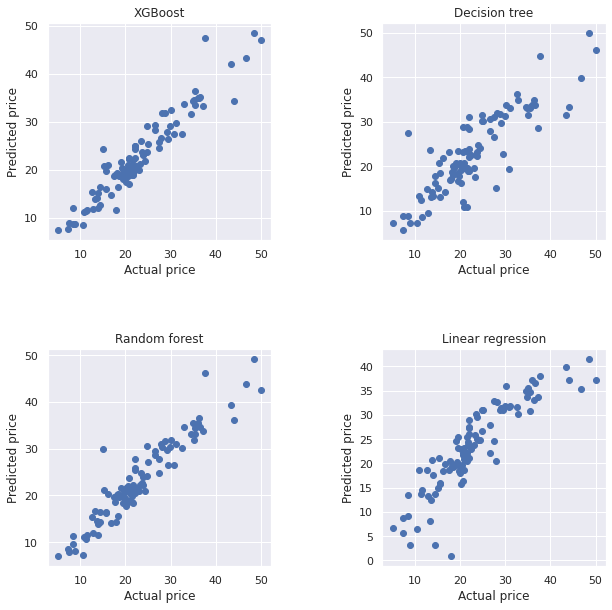

In [ ]:
fig,ax = plt.subplots(nrows=2,ncols=2,figsize=(10,10))
ax.flatten()

ax[0][0].scatter(y_test,prediction1)
ax[0][0].set_xlabel('Actual price')
ax[0][0].set_ylabel('Predicted price')
ax[0][0].set_title('XGBoost')

ax[0][1].scatter(y_test,prediction2)
ax[0][1].set_xlabel('Actual price')
ax[0][1].set_ylabel('Predicted price')
ax[0][1].set_title('Decision tree')

ax[1][0].scatter(y_test,prediction3)
ax[1][0].set_xlabel('Actual price')
ax[1][0].set_ylabel('Predicted price')
ax[1][0].set_title('Random forest')

ax[1][1].scatter(y_test,prediction4)
ax[1][1].set_xlabel('Actual price')
ax[1][1].set_ylabel('Predicted price')
ax[1][1].set_title('Linear regression')

plt.subplots_adjust(wspace=0.5,hspace=0.5)

In [ ]:
comp = pd.DataFrame({
    'Model':['XGBoost','Deision tree','Random forest','Linear regression'],
    'Error':[accuracy1,accuracy2,accuracy3,accuracy4]
})
comp

,Model,Error
0,XGBoost,91.16
1,Deision tree,72.00
2,Random forest,89.00
3,Linear regression,78.00


**Hyperparameter tunning**

In [ ]:
import numpy as np 
import pandas as pd

from sklearn.datasets import load_boston
boston = load_boston()

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(boston.data,boston.target,test_size=0.3)

In [ ]:
from sklearn import ensemble
dt=ensemble.RandomForestRegressor(n_estimators=5,max_depth=3)
dt.fit(x_train,y_train)
dt.score(x_test,y_test)

0.8201585540596841

In [ ]:
from sklearn.model_selection import cross_val_score
scores1 = cross_val_score(ensemble.RandomForestRegressor(n_estimators=5,max_depth=3),x_train,y_train,cv=10)
np.average(scores1)

0.796905302485119

In [ ]:
model=ensemble.RandomForestRegressor()
from sklearn.model_selection import GridSearchCV
parameters=[{'n_estimators':[20,30,40,60,100], 'max_depth':  
             [5,10,15,20]},
             {'n_estimators':[20,30,40,60,100], 'max_depth': 
             [5,10,15,20],'max_features':[2,5,8]}]
             
grid_search = GridSearchCV(estimator=model,
                           param_grid=parameters,
                           cv=10,
                           n_jobs=-1)
                           
grid = grid_search.fit(x_train,y_train)
grid.best_score_

0.884485389014382

In [ ]:
grid.best_params_

{'max_depth': 20, 'n_estimators': 100}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
model=ensemble.RandomForestRegressor()
param_grid=[{'n_estimators':[20,30,40,60,100], 'max_depth':[5,10,15,20] 
          },{'n_estimators':[20,30,40,60,100], 'max_depth':[5,10,15,20]
             ,'max_features':[2,5,8]}]

rnd_search = RandomizedSearchCV(model, param_grid, cv=10, 
                                          return_train_score=True)
rnd_search.fit(x_train,y_train)
rnd_search.best_score_

0.8828795423362308

In [ ]:
rnd_search.best_params_

{'n_estimators': 40, 'max_depth': 15}

 A simple solution could be to start with a random search to reduce the parameter space and then do a grid search to select the optimal values within this space.

**Comparison of L2 gradient descent and closed form**


In [ ]:
boston['DESCR']

".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000

In [ ]:
data = boston['data']
# we will only work with two of the features: INDUS and RM
x_input = data[:, [2,5]]
y_target = boston['target']

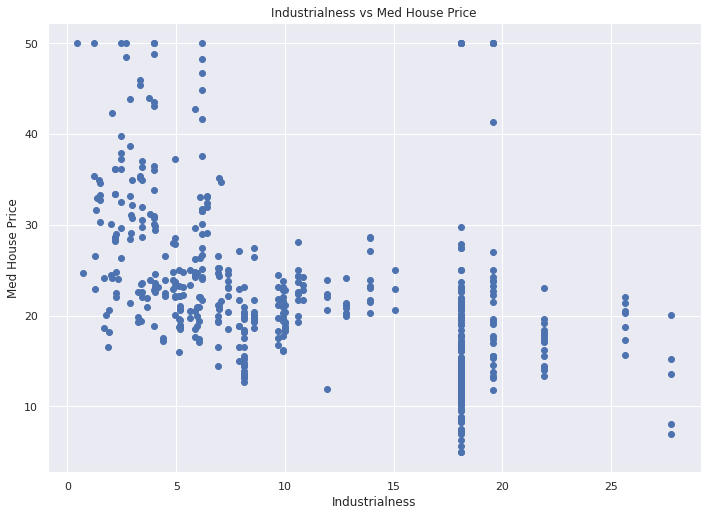

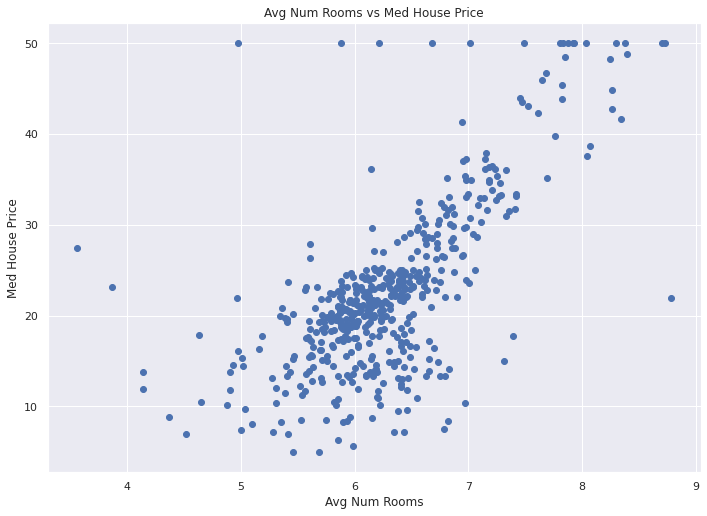

In [ ]:
plt.title('Industrialness vs Med House Price')
plt.scatter(x_input[:, 0], y_target)
plt.xlabel('Industrialness')
plt.ylabel('Med House Price')
plt.show()

plt.title('Avg Num Rooms vs Med House Price')
plt.scatter(x_input[:, 1], y_target)
plt.xlabel('Avg Num Rooms')
plt.ylabel('Med House Price')
plt.show()

In [ ]:
def cost(w1, w2, b, X, t):
    '''
    Evaluate the cost function in a non-vectorized manner for 
    inputs `X` and targets `t`, at weights `w1`, `w2` and `b`.
    '''
    # TODO: write this!
    costs = 0
    for i in range(len(t)):
        y_i = w1 * X[i, 0] + w2 * X[i, 1] + b
        t_i = t[i]
        costs += 0.5 * (y_i - t_i) ** 2
    return costs / len(t)


cost(3, 5, 20, x_input, y_target)

2241.1239166749006

In [ ]:
cost(3, 5, 0, x_input, y_target)

1195.1098850543478

In [ ]:
def cost_vectorized(w1, w2, b, X, t):
    '''
    Evaluate the cost function in a vectorized manner for 
    inputs `X` and targets `t`, at weights `w1`, `w2` and `b`.
    '''
    # TODO: write this!
    N = len(y_target)
    w = np.array([w1, w2])
    y = np.dot(X, w) + b * np.ones(N)
    return np.sum((y - t)**2) / (2.0 * N)


cost_vectorized(3, 5, 20, x_input, y_target)

2241.1239166749015

In [ ]:
cost_vectorized(3, 5, 0, x_input, y_target)


1195.1098850543478

In [ ]:
import time

t0 = time.time()
print(cost(4, 5, 20, x_input, y_target))
t1 = time.time()
print(t1 - t0)

3182.406341674902
0.0017421245574951172


In [ ]:
t0 = time.time()
print(cost_vectorized(4, 5, 20, x_input, y_target))
t1 = time.time()
print(t1 - t0)

3182.4063416749013
0.0019326210021972656


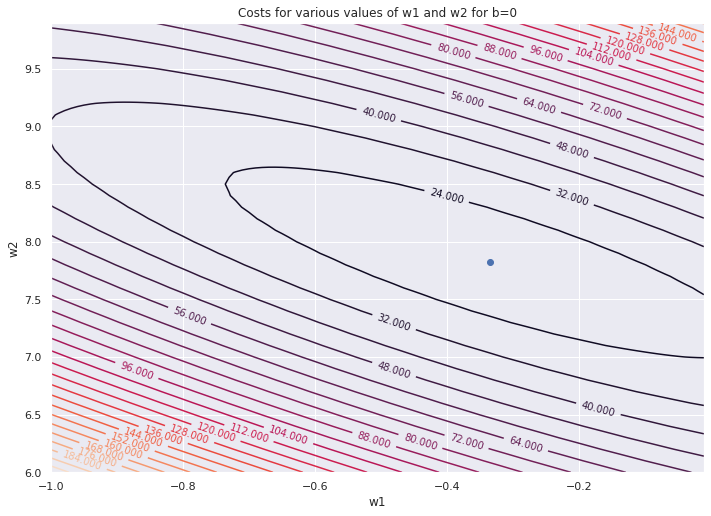

In [ ]:
w1s = np.arange(-1.0, 0.0, 0.01)
w2s = np.arange(6.0, 10.0, 0.1)
z_cost = []
for w2 in w2s:
    z_cost.append([cost_vectorized(w1, w2, -22.89831573, x_input, y_target) for w1 in w1s])
z_cost = np.array(z_cost)
np.shape(z_cost)
W1, W2 = np.meshgrid(w1s, w2s)
CS = plt.contour(W1, W2, z_cost, 25)
plt.clabel(CS, inline=1, fontsize=10)
plt.title('Costs for various values of w1 and w2 for b=0')
plt.xlabel("w1")
plt.ylabel("w2")
plt.plot([-0.33471389], [7.82205511], 'o') # this will be the minima that we'll find later
plt.show()

In [ ]:
x_in = np.concatenate([x_input, np.ones([np.shape(x_input)[0], 1])], axis=1)
x_in

array([[ 2.31 ,  6.575,  1.   ],
       [ 7.07 ,  6.421,  1.   ],
       [ 7.07 ,  7.185,  1.   ],
       ...,
       [11.93 ,  6.976,  1.   ],
       [11.93 ,  6.794,  1.   ],
       [11.93 ,  6.03 ,  1.   ]])

In [ ]:
def solve_exactly(X, t):
    
    N, D = np.shape(X)
    A = np.matmul(X.T, X)
    c = np.dot(X.T, t)
    return np.matmul(np.linalg.inv(A), c)


solve_exactly(x_in, y_target)

array([ -0.33471389,   7.82205511, -22.89831573])

In [ ]:
np.linalg.lstsq(x_in, y_target)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """Entry point for launching an IPython kernel.


(array([ -0.33471389,   7.82205511, -22.89831573]),
 array([19807.614505]),
 3,
 array([318.75354429,  75.21961717,   2.10127199]))

In [ ]:
def gradfn(weights, X, t):
   
    N, D = np.shape(X)
    y_pred = np.matmul(X, weights)
    error = y_pred - t
    return np.matmul(np.transpose(x_in), error) / float(N)

In [ ]:
def solve_via_gradient_descent(X, t, print_every=5000,
                               niter=100000, alpha=0.005):
   
    N, D = np.shape(X)
    # initialize all the weights to zeros
    w = np.zeros([D])
    for k in range(niter):
        dw = gradfn(w, X, t)
        w = w - alpha*dw
        if k % print_every == 0:
            print('Weight after %d iteration: %s' % (k, str(w)))
    return w

In [ ]:
solve_via_gradient_descent( X=x_in, t=y_target)

Weight after 0 iteration: [1.10241186 0.73047508 0.11266403]
Weight after 5000 iteration: [-0.48304613  5.10076868 -3.97899253]
Weight after 10000 iteration: [-0.45397323  5.63413678 -7.6871518 ]
Weight after 15000 iteration: [ -0.43059857   6.06296553 -10.66851736]
Weight after 20000 iteration: [ -0.41180532   6.40774447 -13.06553969]
Weight after 25000 iteration: [ -0.39669551   6.68494726 -14.9927492 ]
Weight after 30000 iteration: [ -0.38454721   6.90781871 -16.54222851]
Weight after 35000 iteration: [ -0.37477995   7.08700769 -17.78801217]
Weight after 40000 iteration: [ -0.36692706   7.23107589 -18.78962409]
Weight after 45000 iteration: [ -0.36061333   7.34690694 -19.59492155]
Weight after 50000 iteration: [ -0.35553708   7.44003528 -20.24238191]
Weight after 55000 iteration: [ -0.35145576   7.5149106  -20.762941  ]
Weight after 60000 iteration: [ -0.34817438   7.57511047 -21.18147127]
Weight after 65000 iteration: [ -0.34553614   7.62351125 -21.51797024]
Weight after 70000 iter

array([ -0.33706425,   7.77893565, -22.59853432])

In [ ]:
np.linalg.lstsq(x_in, y_target)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """Entry point for launching an IPython kernel.


(array([ -0.33471389,   7.82205511, -22.89831573]),
 array([19807.614505]),
 3,
 array([318.75354429,  75.21961717,   2.10127199]))